## Constant coefficients for the equation - Comparison with Central Difference scheme with IC and BCs.

$$ \frac {\partial U}{\partial t} = D\frac {\partial^2 U}{\partial x^2} - v\frac {\partial U}{\partial x} + c*U + d $$

$$ IC: U(x, 0) = \exp(-x**2) $$ 
$$ BC: Periodic: U(0, t) = U(1, t) $$
$$                 \frac {\partial U(0, t)}{\partial x} =  \frac {\partial U(1, t)}{\partial t} $$

In [2]:
from scipy.linalg import solve
# Define the equation parameters
from scipy.special import erfc
import pandas as pd
import numpy as np
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt

In [64]:
k = np.linspace(0, 3, 101)
l=np.linspace(0, 1, 101)
nx = 127
error = k-l
ss = np.linalg.norm(error)/np.sqrt(5)
print(ss)
f = np.linspace(0, 6, 101)
error = k-f
ss = np.linalg.norm(error)/np.sqrt(5)
print(ss)

error = l-k
ss = np.linalg.norm(error)/np.sqrt(5)
print(ss)
k = np.linspace(0,1,(nx+1))
t = np.linspace(0,1,nx)
print(k[1])
print(t[1])
print(1/(nx))
print(1/(nx+1))
print(np.shape(k))

print(np.shape(t))
print("\n\n")
nx = 128
k = np.linspace(0,1,nx+1)
t = np.linspace(0,1,nx)
print(k[1])
print(t[1])
print(1/(nx))
print(1/(nx+1))
nx = 127;
print(np.shape(k))
k = np.linspace(0,1,(nx+1))
print(np.shape(t))
t = [k,l]
# print(t)

5.202691611079788
7.804037416619682
5.202691611079788
0.007874015748031496
0.007936507936507936
0.007874015748031496
0.0078125
(128,)
(127,)



0.0078125
0.007874015748031496
0.0078125
0.007751937984496124
(129,)
(128,)


In [77]:
# k[1::2]
print(np.shape(k))
lk = k[:-1:2]
print(np.shape(lk))
lk = np.concatenate((lk, k[-1:]), axis = 0)
print(np.shape(lk))
print(lk)

(128,)
(64,)
(65,)
[0.         0.01574803 0.03149606 0.04724409 0.06299213 0.07874016
 0.09448819 0.11023622 0.12598425 0.14173228 0.15748031 0.17322835
 0.18897638 0.20472441 0.22047244 0.23622047 0.2519685  0.26771654
 0.28346457 0.2992126  0.31496063 0.33070866 0.34645669 0.36220472
 0.37795276 0.39370079 0.40944882 0.42519685 0.44094488 0.45669291
 0.47244094 0.48818898 0.50393701 0.51968504 0.53543307 0.5511811
 0.56692913 0.58267717 0.5984252  0.61417323 0.62992126 0.64566929
 0.66141732 0.67716535 0.69291339 0.70866142 0.72440945 0.74015748
 0.75590551 0.77165354 0.78740157 0.80314961 0.81889764 0.83464567
 0.8503937  0.86614173 0.88188976 0.8976378  0.91338583 0.92913386
 0.94488189 0.96062992 0.97637795 0.99212598 1.        ]


In [113]:
def testCD_PS(a, b, c, d, nx, nt):

    L = 1.0
    T = 1.0


    x = np.linspace(0, L, nx+1)
    t = np.linspace(0, T, nt+1)
    xin = np.linspace(0, L, nx+1);
    u = np.exp(-x**2)#np.sin(np.pi*xin)
    ui = u;
    U_CDI = np.zeros((nx+1, nt+1))
    error_2norm_CDI_PSTD = np.zeros(nt+1)

    # Discretization of space and time
    dx = 2*L/(nx-1)
    # dt = 0.1*dx**2/D#T/(nt-1)
    # dx = L/(nx+1)
    dt = T/(nt+1)


    #plt.figure()
    #plt.plot(u, label='Initial')
    def numerical_scheme_CDI(u_CDI, a, b, c, d, dx, dt):
        alpha = a*dt/dx
        beta = b*dt/dx**2
        nx = len(u_CDI)-1;
        A = np.zeros((nx+1, nx+1))
        bi = d*dt+u_CDI;
        for j in range(1, len(u_CDI)-1):

            A[j, j-1] = -(beta-alpha/2)
            A[j, j] = 1+2*beta-c*dt
            A[j, j+1] = -(beta+alpha/2)

        # Applying first order Periodic Boundary Condition
        A[0, 0]=(1+2*beta);
        A[0, 1]= (-alpha/2-beta)
        A[0, nx]= (alpha/2-beta)    


        A[nx, 0]= (-alpha/2-beta) ;
        A[nx, nx-1]= (alpha/2 - beta)
        A[nx, nx]= 1+2*beta    


        # Applying second order periodic boundary conditions
        # bt = d*dt+u_CDI;
        # kk = np.zeros(2)
        # bi = [*kk, *bt]

        # A[0, 0]=0;
        # A[0, 1]= 1
        # A[0, N]= -1
        # A[0, N+1]=0

        # A[1, 0] = -1
        # A[1,1] = 0
        # A[1, 2] = 1
        # A[1, N-1] = 1
        # A[1, N] = 0 
        # A[1, N+1] = -1


        # Boundary condition
        # A[0, 0] = -3
        # A[0, 1] = 4
        # A[0, 2] = -1
        # bi[0] = 0

        # A[N, N] = 3
        # A[N, N-1] = -4
        # A[N, N-2] = 1
        # bi[N] = 0


        # A[0,0] = 1.0
        # # A[N,N] = 1.0

        # bi[0] = l
        # bi[N] = r


        u_CDI = solve(A, bi)

        return u_CDI



    # Apply the numerical scheme
    # u = np.exp(-((x+0.5)**2)/(0.00125))
    U_CDI = np.zeros((nx+1, nt+1))
    error_2norm_QI_PSTD = np.zeros(nt)

    u_CDI=u;

    for n in range(nt):
        u_CDI = numerical_scheme_CDI(u_CDI, a, b, c, d, dx, dt)
        U_CDI[:, n] = u_CDI

    #plt.plot(u_CDI, label='Final')
    #plt.show()
    #plt.close()

    plt.rcParams['font.size'] = 18
    fig = plt.figure() 
    plt.imshow(U_CDI, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    title = "CDI - nx = "+str(nx+1)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.show()


    k = 2*np.pi*np.fft.rfftfreq(nx+1, 2*L/(nx))
    k2=k**2;

    # Defining variables
    U_ps = np.zeros((nx+1, nt+1))
    #plt.figure()
    #plt.plot(xin, u, color = 'b', label = "initial")
    # left = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(0.5 - t)**2)/(0.00125 + 0.04*t)))
    # right = (0.025/(np.sqrt(0.000625 + 0.02*t)))*(np.exp((-(1.5 - t)**2)/(0.00125 + 0.04*t)))

    # Solving over time
    for i in range(nt+1): # 
        
        uk = np.fft.rfft(u)

        uk[:] = (uk[:])/(1-(-b*k**2 + a*1j*k+c)*dt) 
        # print(np.shape(uk))    
        u = np.fft.irfft(uk) + d*dt
        U_ps[:, i] = u
        error =  U_CDI[:, i] - u
        error_2norm_CDI_PSTD[i] =np.linalg.norm(error)/np.sqrt(nx)


    fig = plt.figure()  
    plt.imshow((U_ps), cmap='viridis',  extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("CD Scheme with PSTD")
    plt.xlabel('Time')
    plt.ylabel('Position')
    title = "PSTDI - nx = "+str(nx+1)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

    plt.figure();
    plt.plot(x, ui, '-', color='g', label = 'Initial'); 

    plt.plot(x, U_CDI[:, nt-1], '-*', color='b', label = 'CDI Method'); 
    plt.plot(x, U_ps[:, nt-1], '-+', color = 'r', label = 'Spectral Method');
    res =  [U_CDI[:, nt-1], U_ps[:, nt-1]]
    
    plt.legend(loc="upper right")
    title = "Comparison - nx = "+str(nx+1)
    plt.title(title)
    plt.show()
    plt.close()
    plt.figure()
    plt.plot(error_2norm_CDI_PSTD[0:nt], '.', label = 'PSTDI_CDI')
    plt.legend()
    plt.show()
    plt.close()
    return res

# Pe = 100

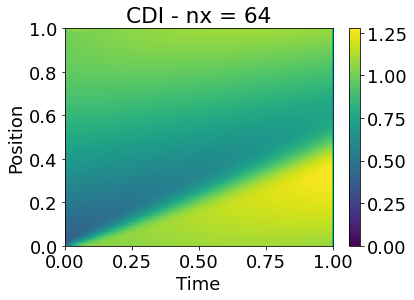

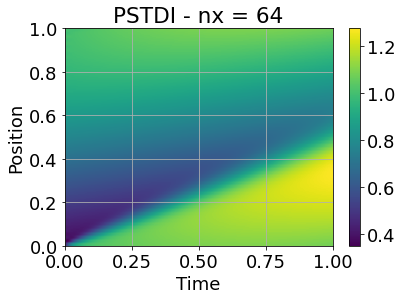

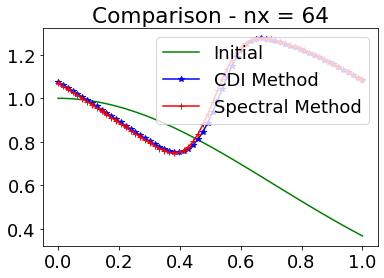

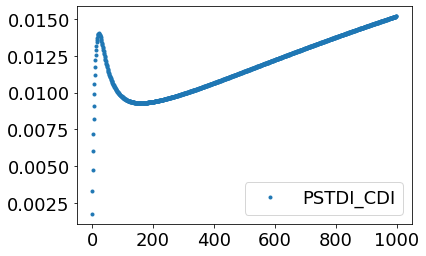

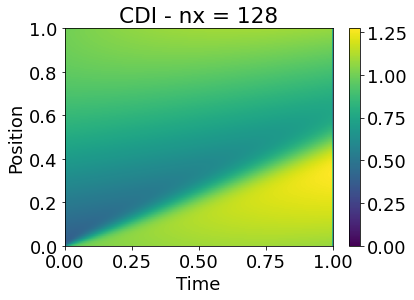

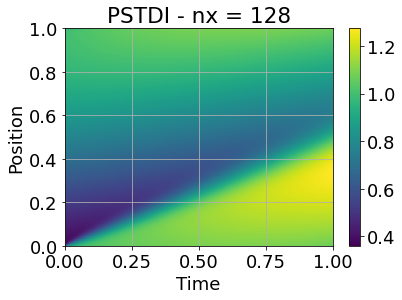

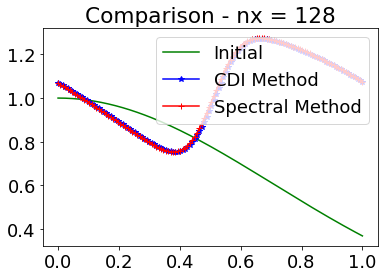

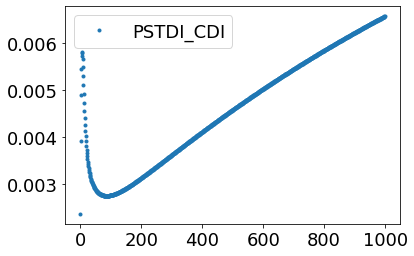

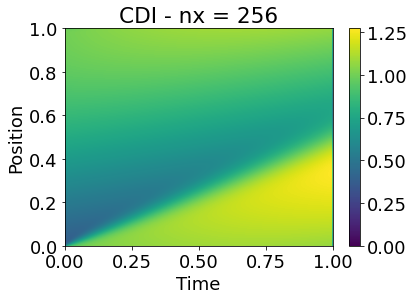

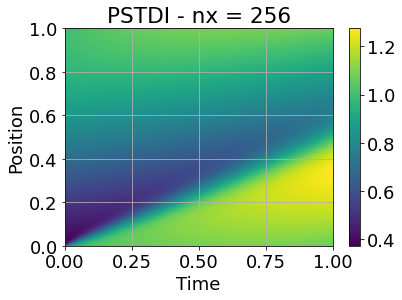

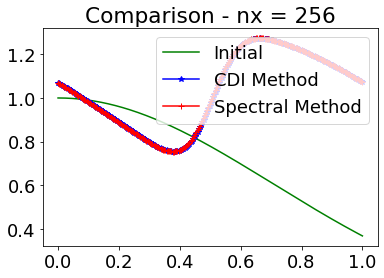

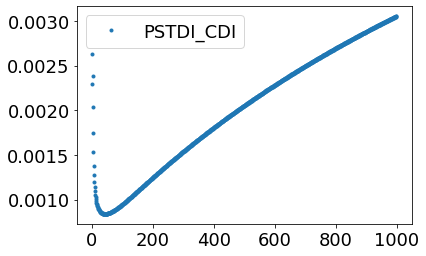

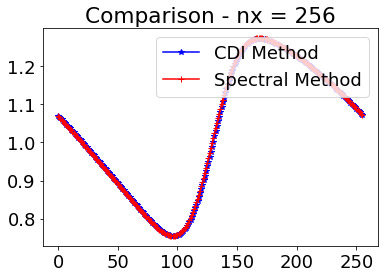

In [114]:

a = 1.0
b = 0.01
c = 0.1; 
d = 0.2

testCD_PS(a, b, c, d, 63, 1000)
testCD_PS(a, b, c, d, 127, 1000)
res = testCD_PS(a, b, c, d, 255, 1000)

plt.figure();
plt.plot(res[0], '-*', color='b', label = 'CDI Method'); 
plt.plot(res[1], '-+', color = 'r', label = 'Spectral Method');
plt.legend(loc="upper right")
title = "Comparison - nx = "+str(255+1)
plt.title(title)
plt.show()
plt.close()


# Pe = 1

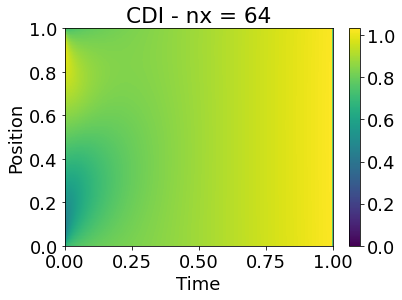

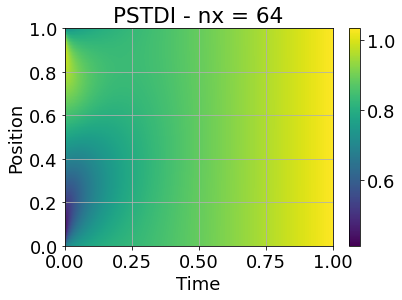

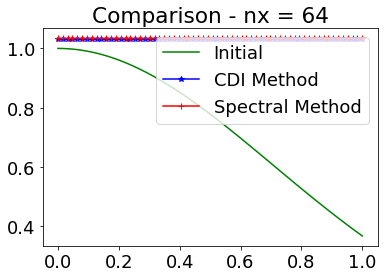

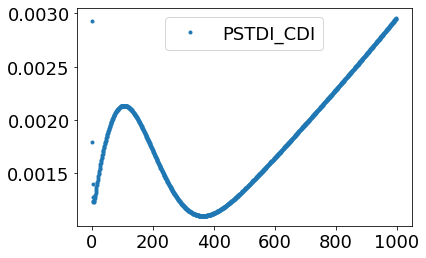

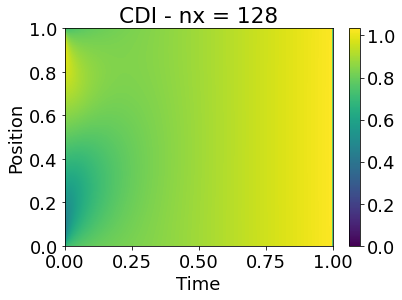

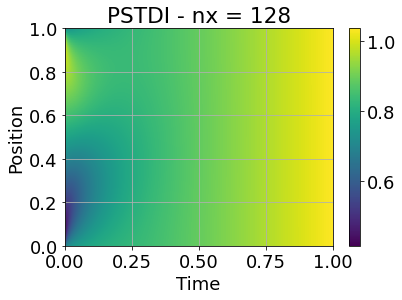

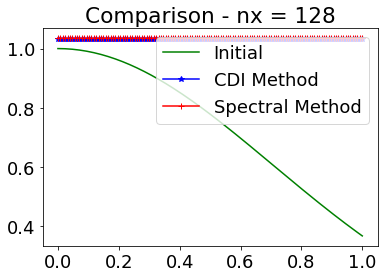

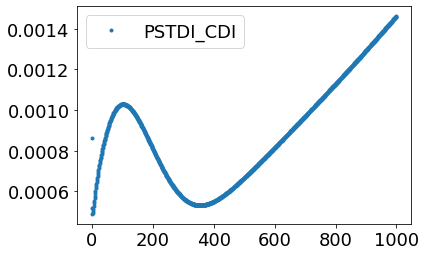

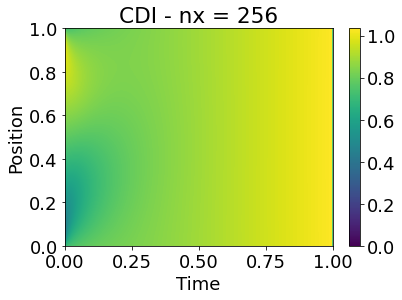

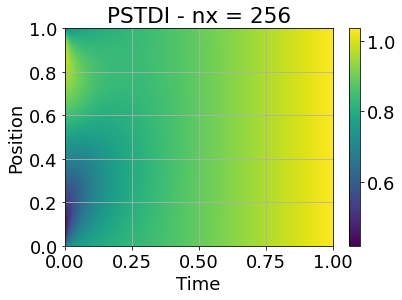

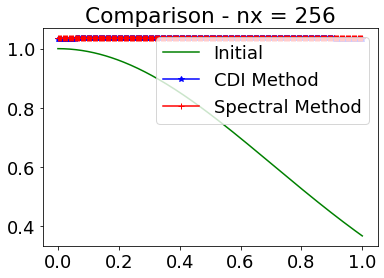

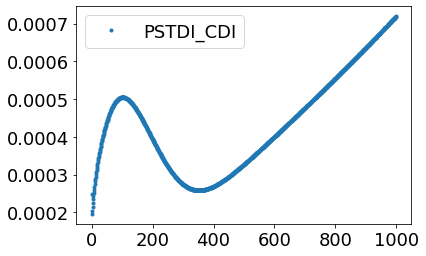

[array([1.03417323, 1.03418111, 1.03418886, 1.0341965 , 1.03420402,
        1.03421142, 1.03421871, 1.03422589, 1.03423295, 1.03423991,
        1.03424675, 1.03425349, 1.03426012, 1.03426664, 1.03427305,
        1.03427937, 1.03428558, 1.03429169, 1.0342977 , 1.03430361,
        1.03430942, 1.03431513, 1.03432075, 1.03432627, 1.0343317 ,
        1.03433704, 1.03434228, 1.03434744, 1.0343525 , 1.03435748,
        1.03436236, 1.03436716, 1.03437188, 1.03437651, 1.03438106,
        1.03438552, 1.03438991, 1.03439421, 1.03439843, 1.03440257,
        1.03440664, 1.03441062, 1.03441453, 1.03441837, 1.03442213,
        1.03442582, 1.03442943, 1.03443297, 1.03443645, 1.03443985,
        1.03444318, 1.03444644, 1.03444963, 1.03445276, 1.03445582,
        1.03445881, 1.03446174, 1.0344646 , 1.0344674 , 1.03447014,
        1.03447282, 1.03447543, 1.03447798, 1.03448047, 1.03448291,
        1.03448528, 1.03448759, 1.03448985, 1.03449205, 1.03449419,
        1.03449628, 1.03449831, 1.03450029, 1.03

In [115]:

a = 1.0
b = 1.0
c = 0.1; 
d = 0.2

testCD_PS(a, b, c, d, 63, 1000)
testCD_PS(a, b, c, d, 127, 1000)
testCD_PS(a, b, c, d, 255, 1000)

# Pe = 0.1

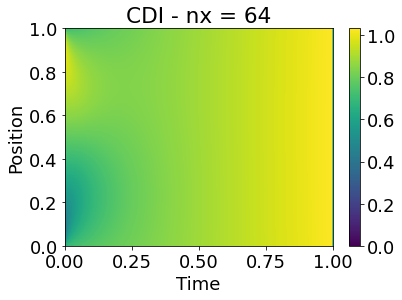

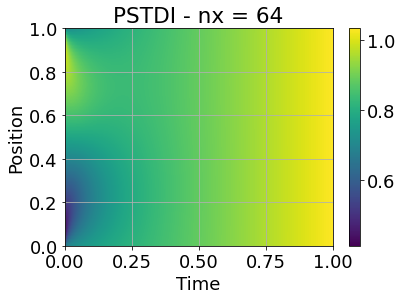

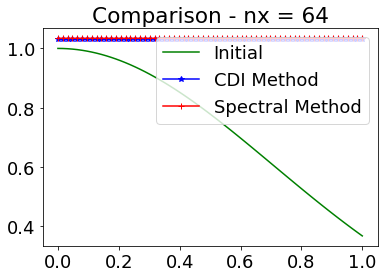

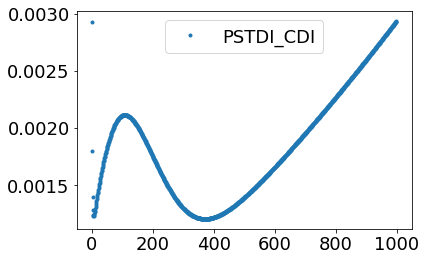

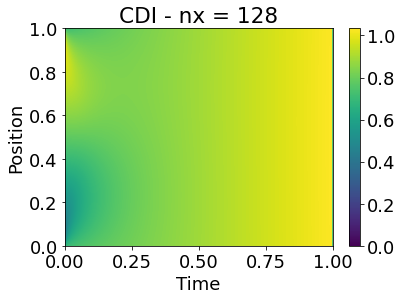

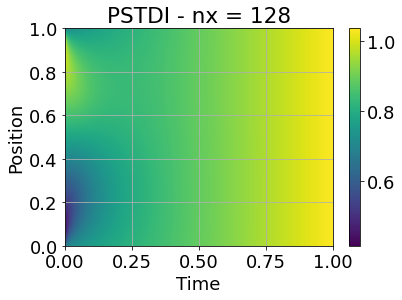

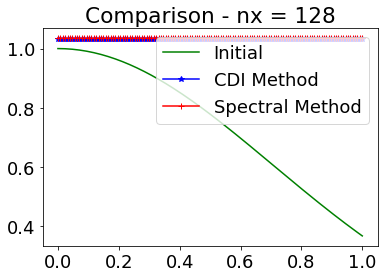

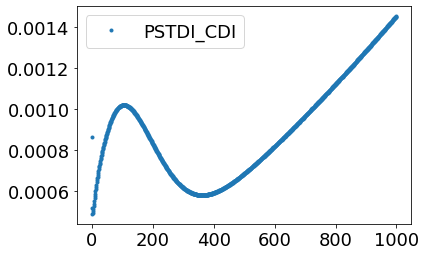

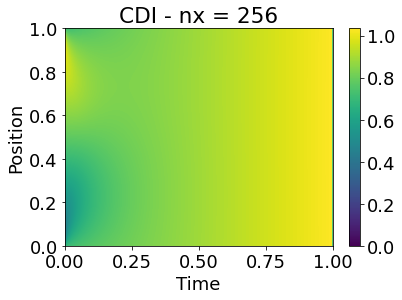

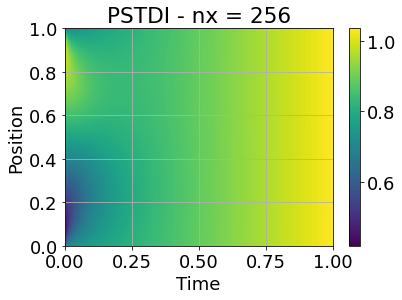

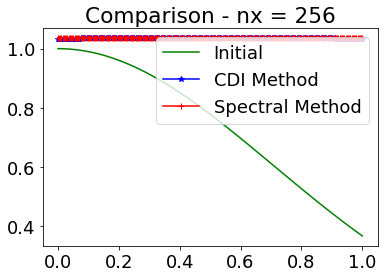

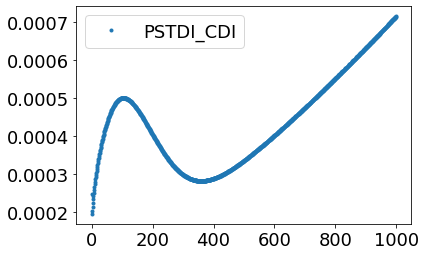

[array([1.03416162, 1.03416858, 1.03417548, 1.03418232, 1.0341891 ,
        1.03419582, 1.03420248, 1.03420907, 1.03421561, 1.03422209,
        1.0342285 , 1.03423485, 1.03424115, 1.03424738, 1.03425355,
        1.03425965, 1.0342657 , 1.03427169, 1.03427761, 1.03428347,
        1.03428927, 1.034295  , 1.03430068, 1.03430629, 1.03431184,
        1.03431733, 1.03432275, 1.03432811, 1.03433341, 1.03433865,
        1.03434382, 1.03434894, 1.03435398, 1.03435897, 1.03436389,
        1.03436875, 1.03437355, 1.03437828, 1.03438295, 1.03438756,
        1.03439211, 1.03439659, 1.03440101, 1.03440536, 1.03440965,
        1.03441388, 1.03441805, 1.03442215, 1.03442619, 1.03443017,
        1.03443408, 1.03443794, 1.03444172, 1.03444545, 1.03444911,
        1.03445271, 1.03445625, 1.03445973, 1.03446314, 1.03446649,
        1.03446978, 1.034473  , 1.03447617, 1.03447927, 1.03448231,
        1.03448529, 1.0344882 , 1.03449106, 1.03449385, 1.03449658,
        1.03449925, 1.03450186, 1.03450441, 1.03

In [116]:

a = 0.1
b = 1.0
c = 0.1; 
d = 0.2

tests(a, b, c, d, 63, 1000)
tests(a, b, c, d, 127, 1000)
tests(a, b, c, d, 255, 1000)

# Pe = 100 without any source terms

sdeds


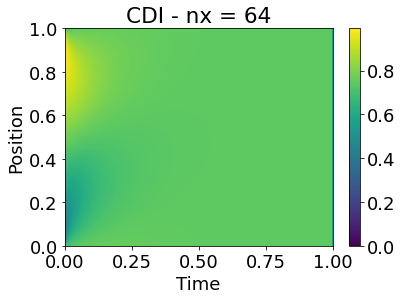

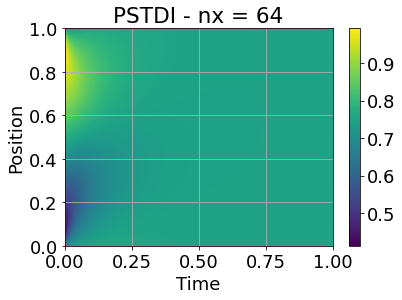

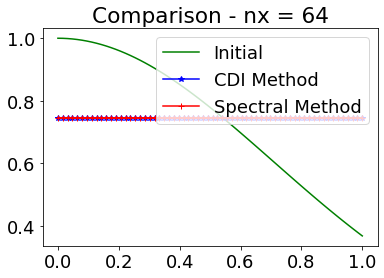

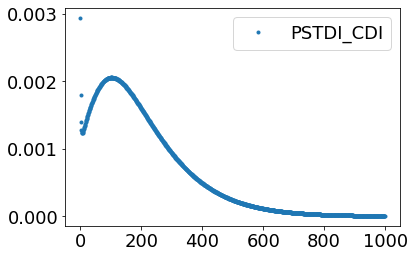

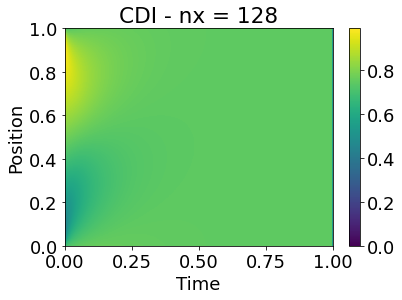

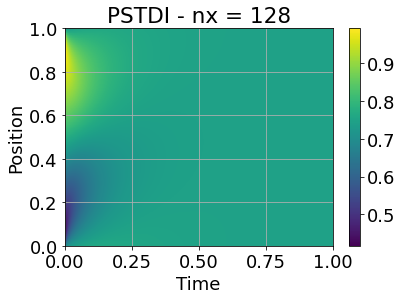

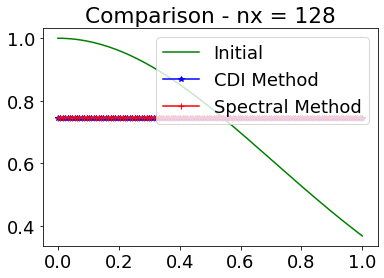

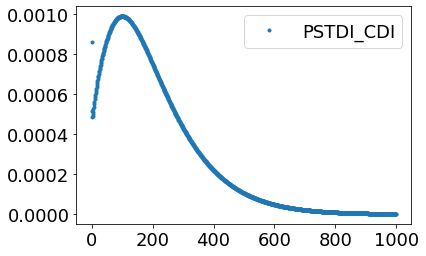

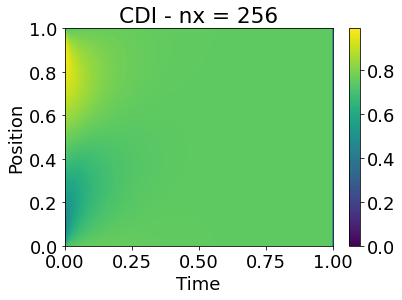

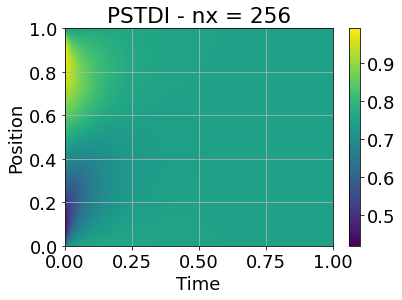

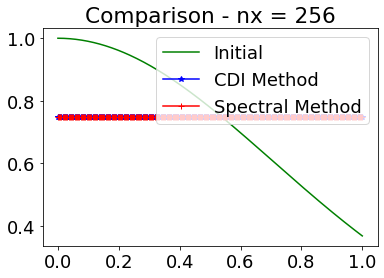

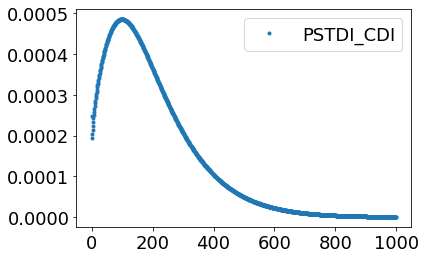

[array([0.74658069, 0.74658034, 0.74657998, 0.74657962, 0.74657926,
        0.7465789 , 0.74657854, 0.74657817, 0.74657781, 0.74657745,
        0.74657709, 0.74657672, 0.74657636, 0.746576  , 0.74657564,
        0.74657528, 0.74657492, 0.74657457, 0.74657421, 0.74657386,
        0.74657351, 0.74657316, 0.74657281, 0.74657247, 0.74657213,
        0.7465718 , 0.74657146, 0.74657114, 0.74657081, 0.74657049,
        0.74657017, 0.74656986, 0.74656955, 0.74656925, 0.74656895,
        0.74656866, 0.74656837, 0.74656809, 0.74656781, 0.74656754,
        0.74656728, 0.74656702, 0.74656677, 0.74656652, 0.74656629,
        0.74656605, 0.74656583, 0.74656561, 0.7465654 , 0.7465652 ,
        0.746565  , 0.74656481, 0.74656463, 0.74656446, 0.74656429,
        0.74656414, 0.74656399, 0.74656385, 0.74656372, 0.74656359,
        0.74656348, 0.74656337, 0.74656327, 0.74656318, 0.7465631 ,
        0.74656303, 0.74656296, 0.74656291, 0.74656286, 0.74656282,
        0.74656279, 0.74656277, 0.74656276, 0.74

In [135]:

a = 1.0
b = 1.0
c = 0.0
d = 0.0
print("sdeds")
tests(a, b, c, d, 63, 1000)
tests(a, b, c, d, 127, 1000)
tests(a, b, c, d, 255, 1000)

ssfw


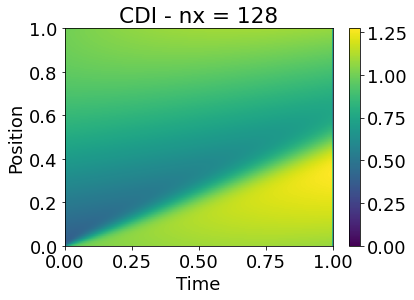

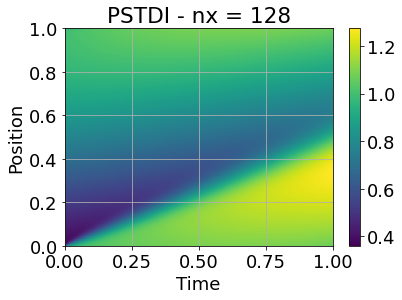

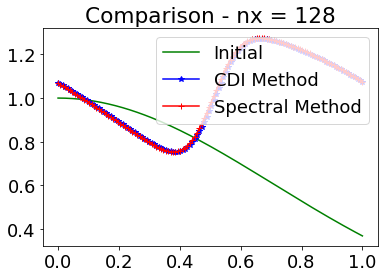

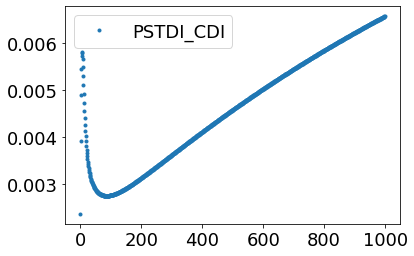

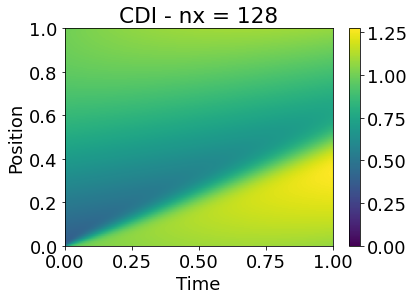

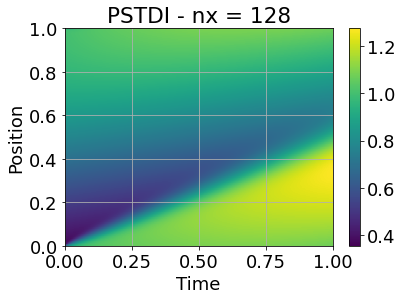

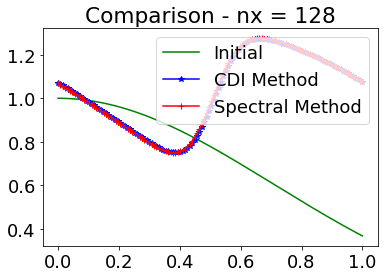

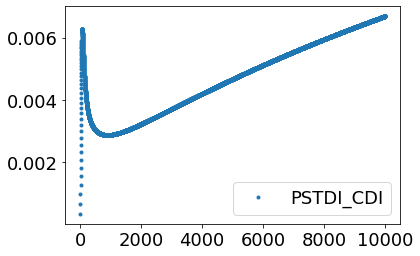

[array([1.0703916 , 1.0653818 , 1.05883013, 1.05205639, 1.04521472,
        1.03832473, 1.03139052, 1.02441437, 1.01739838, 1.01034462,
        1.00325513, 0.99613196, 0.98897717, 0.98179279, 0.97458086,
        0.96734339, 0.96008242, 0.95279994, 0.94549799, 0.93817857,
        0.93084369, 0.9234954 , 0.91613577, 0.9087669 , 0.90139101,
        0.89401042, 0.88662765, 0.87924548, 0.87186709, 0.86449622,
        0.85713735, 0.84979601, 0.84247912, 0.83519544, 0.82795615,
        0.82077555, 0.81367188, 0.80666832, 0.79979413, 0.79308593,
        0.78658908, 0.78035911, 0.77446321, 0.76898151, 0.76400828,
        0.75965261, 0.7560387 , 0.75330536, 0.7516047 , 0.75109977,
        0.75196101, 0.75436162, 0.75847159, 0.76445077, 0.77244105,
        0.7825579 , 0.79488198, 0.80945103, 0.82625275, 0.84521937,
        0.86622417, 0.88908077, 0.9135452 , 0.93932112, 0.96606792,
        0.99341157, 1.02095752, 1.04830503, 1.07506206, 1.1008597 ,
        1.12536543, 1.14829417, 1.16941665, 1.18

In [138]:

a = 1.0
b = 0.01
c = 0.1; 
d = 0.2
print("ssfw")
tests(a, b, c, d, 127, 1000)
tests(a, b, c, d, 127, 10000)

# Trying to compare with the semi-infinite solutions of Ogata and Banks

### Solution for No Production Decay
    Lapidus and Amundson 1952
    Ogata and Banks 1961
    Equation: R*dC/dt = D*d2C/dx2 - v*dC/dx
    IC: C(x, 0) = Ci
    BCs:Dirichlet for 0<t<to: C(0, t) = Co
    Neumann: dC/dx(inf, t) = 0

$$ \frac {\partial U}{\partial t} = D\frac {\partial^2 U}{\partial x^2} - v\frac {\partial U}{\partial x} + c*U + d $$
$$ IC: U(x, 0) = C_i  $$
 $$  BC - Left: U(0, t) = C_o \ \ \   \ 0<t<t_o $$
 $$  BC - Right: \frac {dU(\infty, t)}{dx} = 0 $$
    $$  c = 0 $$
    $$  d = 0 $$

In [139]:
def Analytical_Ogata(a, b, c, d, L, T, nx, nt):
    # Analytical - du/dt = -v*du/dx+D*d2u/dx2

    Ci = 0; 
    Co = 2;
    # dCinf/dx = 0;
    R = 1; 
    D = b
    v = -a
    print(v, D, c, d)
    x = np.linspace(0, L, nx+1);
    t = np.linspace(0, T, nt);


    C = np.zeros((nt, nx))
    for i in range(nt):  
        for j in range(nx):      
            C[i, j] = Ci + ((Co-Ci)/2)*(erfc((x[j]-v*t[i])/(2*np.sqrt(D*t[i]/R))) + (np.exp(v*x[j]/(D/R)))*(erfc((x[j]+v*t[i])/(2*np.sqrt(D*t[i]/R)))))

    U_exact = np.transpose(C);

    fig = plt.figure()  
    plt.imshow(np.transpose(C), cmap='viridis',  extent=[0, T, L, 0], aspect='auto')
    plt.colorbar()
    plt.title("Exact")
    plt.xlabel('Time')
    plt.ylabel('Position')

    #fig.set_size_inches(30.,18.)
    # plt.savefig('U_CDI.png', dpi = 900)
    plt.show()
    
    return U_exact[:, -1]


ddfed
1.0 0.01 0 0


C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


<Figure size 432x288 with 0 Axes>

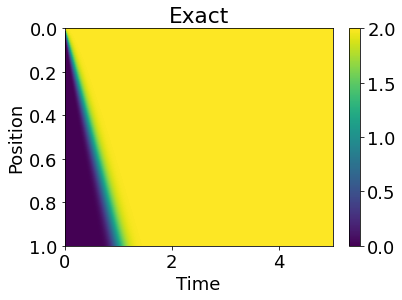

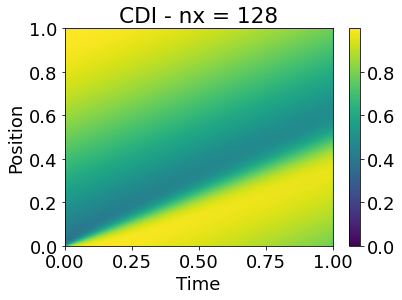

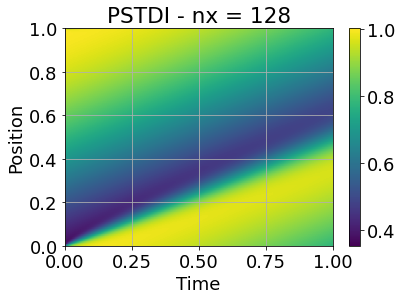

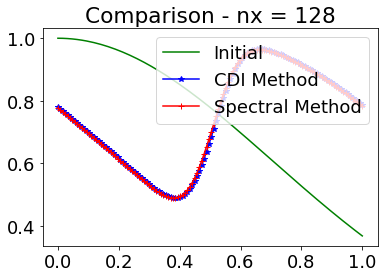

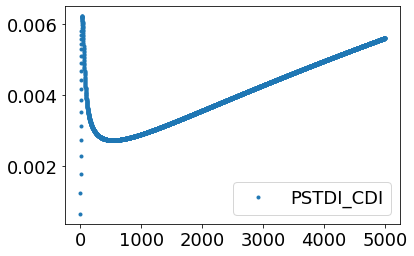

ValueError: cannot copy sequence with size 2 to array axis with dimension 128

In [140]:
## Ogata and Banks - No production or decay terms
axs = [-1.0, -0.1, -0.01]
bs = [0.01, 0.1]
it = 0
L = 1.0;
T = 5.0;
nx = 128;
nt = 5001; 
plt.figure()
print("ddfed")
U_compab = np.zeros((12, nx))
for a in axs:
    for b in bs: 
        pe = abs(a/b);
        # U_exact =  
        U_compab[it, :]  = Analytical_Ogata(a, b, 0, 0, L, T, nx, nt)
        U_compab[it+1, :] = tests(-a, b, 0, 0, nx-1, nt-1)
        # U_comp = comparePeclet(a, b)
        
        plt.plot(U_compab[i, :],'+-'); plt.plot(U_compab[i+1, :],'-', label = str(np.round(pe, 3)));
        plt.ylim([0, 2.1])
        # plt.title("Pe = "+str(np.round(pe, 3)))
        
        plt.xlabel("Dimensionless Time")
        plt.ylabel("Dimensionless Concentration")
        plt.title("Ogata and Banks - Different Pe="+str(np.round(pe, 3)))
        
        it = it+2

# Printing the temporal grid tests
zipped1 = list(zip(U_compab[0, :], U_compab[1, :], U_compab[2, :], U_compab[3, :], U_compab[4, :], U_compab[5, :], U_compab[6, :], U_compab[7, :], U_compab[8, :], U_compab[9, :], U_compab[10, :], U_compab[11, :]))

df2 = pd.DataFrame(zipped1, columns=['OB', 'Pe = 100.0', 'OB', 'Pe = 10.0', 'OB', 'Pe = 10.0','OB', 'Pe = 1.0','OB', 'Pe = 1.0','OB', 'Pe = 0.1'])

df2.to_csv('Analysis_OgataBanks_complete.csv', index=False)



# Didn't work - Using MMS

# MMS for the same manufactured solution as it satisfies the present condition
For an equation with given IC and periodic BCs :
$$ \frac {\partial U}{\partial t} = D\frac {\partial^2 U}{\partial x^2} + v\frac {\partial U}{\partial x}$$
$$ IC: U(x, 0) = C_i $$
$$ BC - Left: U(0, t) = -C_o $$
$$ BC - Right: U(0, t) = -C_o $$
$$ BC - Left: \frac {dU(0, t)}{dx} = 0 $$
$$ BC - Right: \frac {dU(1, t)}{dx} = 0 $$

The chosen equation is: 
$$ U(x,t) = C_o \cos(\pi(2x -1)) e^{-t}$$

The initial and boundary condition terms: I.C.: Ci*sin(pi*x)
        Boundary Conditions: Periodic BC
$$ U(x, 0) = C_o\cos( \pi(2x -1))$$
$$ U(0, t) = -C_o e^{-t} $$
$$ U(1, t) = -C_o e^{-t} $$

$$ \frac {dU}{dx} (0, t) = -2\pi C_o\sin( \pi(2*0 -1)) e^{-t} = 0$$ 
$$ \frac {dU}{dx} (1, t) = -2\pi C_o\sin(\pi(2*1 -1)) e^{-t} = 0$$ 

The derivative terms are:

$$ \frac {dU}{dt} = -C_o\cos(\pi (2*x-1)) e^{-t}$$
$$ \frac {dU}{dx} = -C_o 2 \pi \sin(\pi (2*x-1)) e^{-t}$$
$$ \frac {d^2U}{dx^2} = -C_o 4 \pi^2 \cos(\pi (2*x-1)) e^{-t}$$

The new source term will be:
    
$$ d = \frac {dU}{dt} - v*\frac {dU}{dx}  - D*\frac {d^2U}{dx^2}$$
$$ d = -C_o\cos(\pi (2*x-1)) e^{-t} - v*2*C_o\pi \sin(\pi (2*x-1)) e^{-t} - D*C_o*4*\pi^2 \cos(\pi (2*x-1)) e^{-t}$$
$$ d =  -C_o e^{-t}(\cos(\pi (2*x-1)) - v*2*\pi \sin(\pi (2*x-1)) - D*4*\pi^2 \cos(\pi (2*x-1))) $$

In [22]:
def numerical_scheme_CDI(u_CDI, a, b, c, d, dx, dt):
        alpha = b*dt/dx
        beta = a*dt/dx**2
        nx = len(u_CDI)-1;
        A = np.zeros((nx+1, nx+1))
        bi = d*dt+u_CDI;
        for j in range(1, len(u_CDI)-1):

            A[j, j-1] = -(beta-alpha/2)
            A[j, j] = 1+2*beta-c*dt
            A[j, j+1] = -(beta+alpha/2)

        # Applying first order Periodic Boundary Condition
        A[0, 0]=(1+2*beta)-c*dt;
        A[0, 1]= (-alpha/2-beta)
        A[0, nx]= (alpha/2-beta)    


        A[nx, 0]= (-alpha/2-beta) ;
        A[nx, nx-1]= (alpha/2 - beta)
        A[nx, nx]= 1+2*beta-c*dt    


        
        u_CDI = solve(A, bi)

        return u_CDI


In [23]:
def numerical_scheme_PSTD(u, a, b, c, d, k, dx, dt):
        uk = np.fft.rfft(u)
        
        uk[:] = (uk[:])/(1-(-a*k**2 + b*1j*k+c)*dt) 
        u = np.fft.irfft(uk) + d*dt
        return u

In [30]:
# Creating function for running the code and getting the error with different number of nodes with left dirichlet and right neumann condition. 
def numericalcodes(nx, nt): 
    # Define the grid
    a = 1.0;
    b = 0.01;
    c = 0.0;
    Co = 1.0;
    L = 1.0
    T = 1.0
    dm = np.zeros((nx+1, nt+1));
    U_exact = np.zeros((nx+1, nt+1));
    # Define x & t
    x = np.linspace(0, L, nx+1)
    t = np.linspace(0, T, nt+1)
    for i in range(nt+1):
        for j in range (nx+1):
            dm[j, i] = -(Co*np.exp(-t[i]))*(np.cos(np.pi*(2*x[j]-1)) - 2*b*np.pi*np.sin(np.pi*(2*x[j]-1)) - a*4*(np.pi**2)*np.cos(np.pi*(2*x[j]-1)))
    
    for i in range(nt+1):
        for j in range (nx+1):
            U_exact[j, i] = Co*np.cos(np.pi*(2*x[j]-1))*np.exp(-t[i])
    fig = plt.figure()  
    plt.imshow((U_exact), cmap='viridis',  extent=[0, L, 0, T], aspect='auto')
    plt.colorbar()
    plt.title("Exact")
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.show()

    # Defining variables and errors
    U_CDI = np.zeros((nx+1, nt+1))
    U_ps = np.zeros((nx+1, nt+1))
    error_2norm_CDI_PSTD = np.zeros(nt+1)
    error_2norm_Exact_CDI = np.zeros(nt+1)
    error_2norm_Exact_PSTD = np.zeros(nt+1)
    
    # Discretization of space and time
    dx = L/(nx)
    dt = T/(nt)
    
    print("\n here \n")
    print(dx)
    print(x[1])
    print(dt)
    print(t[1])
    print("\n here \n")
    u = Co*np.cos(np.pi*(2*x-1)) # np.zeros(nx);
    u_ps = u;
    u_CDI=u;
    u1 = u
    k = 2*np.pi*np.fft.rfftfreq(nx+1, L/(nx))    
    
    # Solving over time
    for i in range(nt+1):
        u_CDI = numerical_scheme_CDI(u_CDI, a, b, c, dm[:, i], dx, dt)
        u_ps = numerical_scheme_PSTD(u_ps, a, b, c, dm[:, i], k, dx, dt)
        if(i<2):
            u1= u_ps
        U_CDI[:, i] = u_CDI
        U_ps[:, i] = u_ps
        error =  U_CDI[:, i] - U_ps[:, i]
        error_2norm_CDI_PSTD[i] =np.linalg.norm(error)/np.sqrt(nx)
        
        error =  U_ps[:, i] - U_exact[:, i]
        error_2norm_Exact_PSTD[i] =np.linalg.norm(error)/np.sqrt(nx)
        errorPSTD = error_2norm_Exact_PSTD[i]
        
        error =  U_CDI[:, i] - U_exact[:, i]
        error_2norm_Exact_CDI[i] =np.linalg.norm(error)/np.sqrt(nx)
        errorCDI = error_2norm_Exact_CDI[i]

    # Errors at time 1s for the two methods(CDI, PSTD) and 7 number of nodes (dx in 20, 40, 60, 80, 100, 120, 150)
    errornorms = np.ones(7)
    errornorms[0] = errorCDI
    errornorms[1] = errorPSTD
    
    plt.rcParams['font.size'] = 18
    fig = plt.figure() 
    plt.imshow(U_CDI, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    title = "CDI - nx = "+str(nx+1)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.show()

    plt.figure()  
    plt.imshow((U_ps), cmap='viridis',  extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("CD Scheme with PSTD")
    plt.xlabel('Time')
    plt.ylabel('Position')
    title = "PSTDI - nx = "+str(nx+1)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

    plt.figure();
    plt.plot(x, u, '-', color='g', label = 'Initial'); 
    plt.plot(x, u1, '-', color='c', label = 'InitialPS'); 
    
    plt.plot(x, U_CDI[:, nt-1], '-*', color='b', label = 'CDI Method'); 
    plt.plot(x, U_ps[:, nt-1], '-+', color = 'r', label = 'Spectral Method');
    plt.plot(x, U_exact[:, nt-1], '.-', color = 'k', label = 'Exact');
    plt.legend(loc="upper right")
    title = "Comparison - nx = "+str(nx+1)
    plt.title(title)
    plt.show()
    plt.close()
    
    plt.figure()
    plt.plot(error_2norm_CDI_PSTD[0:nt+1], '.', label = 'PSTDI_CDI')
    plt.plot(error_2norm_Exact_PSTD[0:nt+1], '.', label = 'Exact_PSTD')
    plt.plot(error_2norm_Exact_CDI[0:nt+1], '.', label = 'Exact_CDI')
    plt.legend()
    plt.show()
    plt.close()
    return errornorms
    

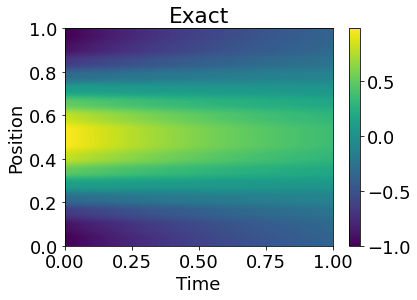


 here 

0.06666666666666667
0.06666666666666667
0.001
0.001

 here 



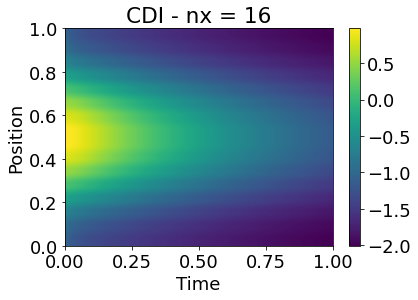

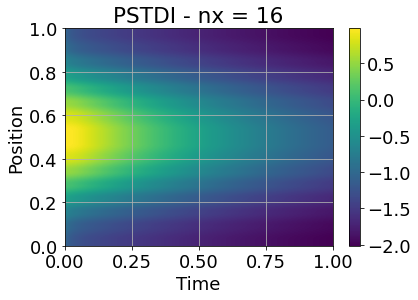

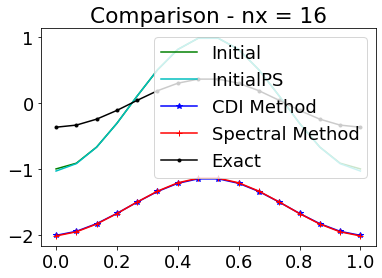

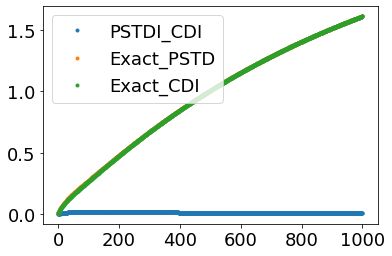

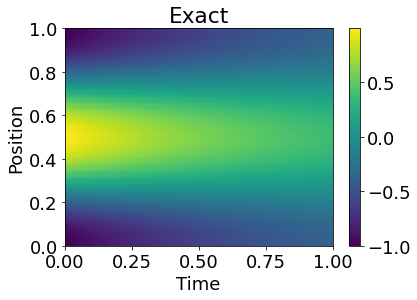


 here 

0.03225806451612903
0.03225806451612903
0.001
0.001

 here 



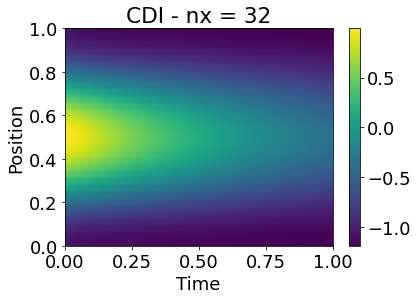

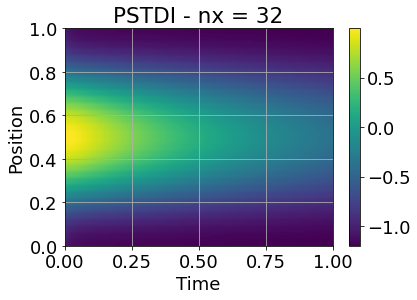

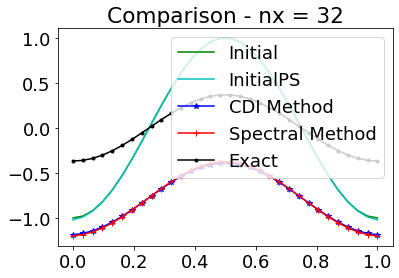

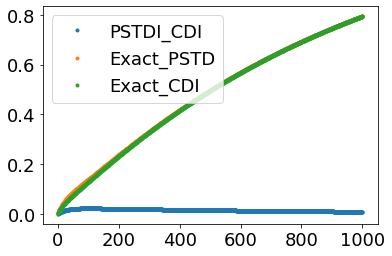

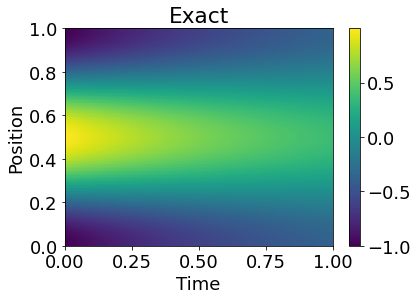


 here 

0.015873015873015872
0.015873015873015872
0.001
0.001

 here 



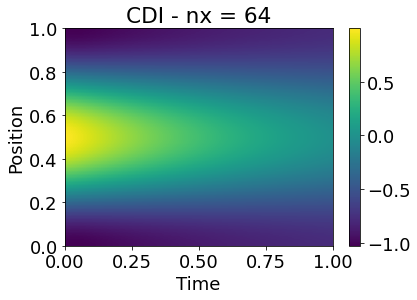

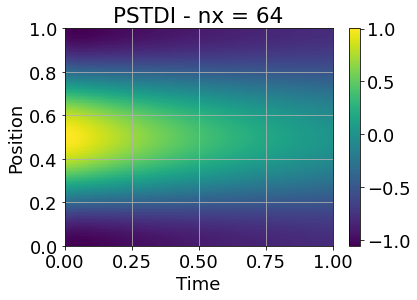

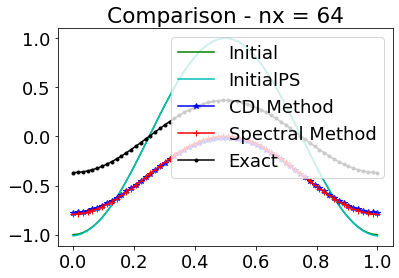

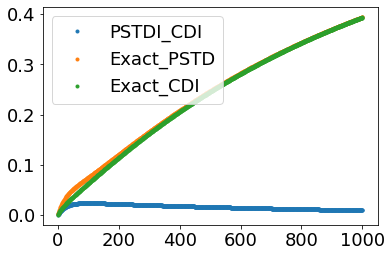

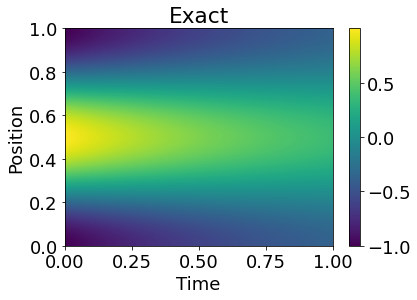


 here 

0.007874015748031496
0.007874015748031496
0.001
0.001

 here 



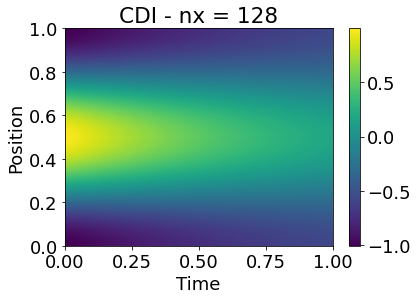

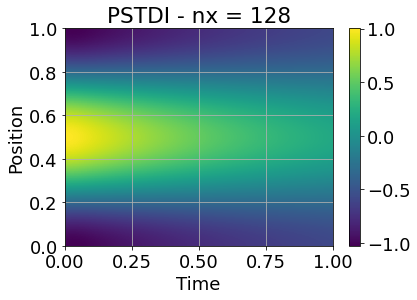

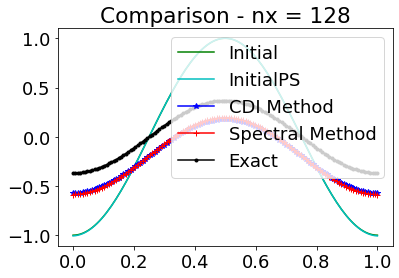

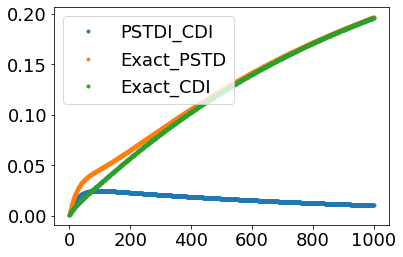

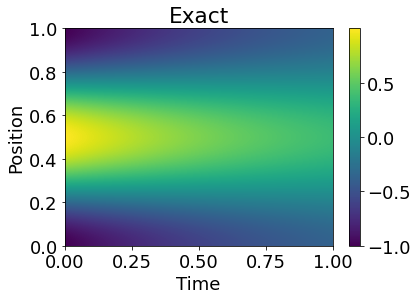


 here 

0.00392156862745098
0.00392156862745098
0.001
0.001

 here 



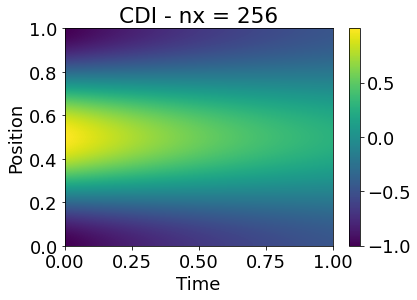

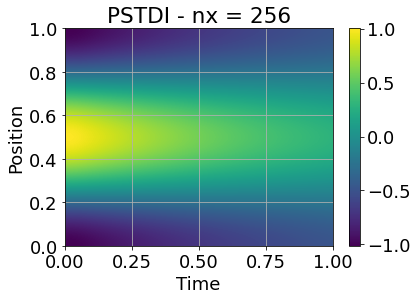

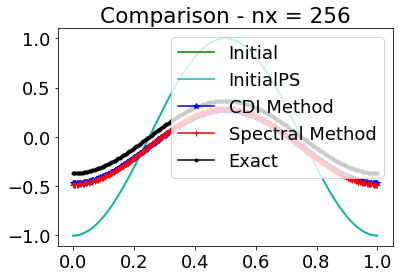

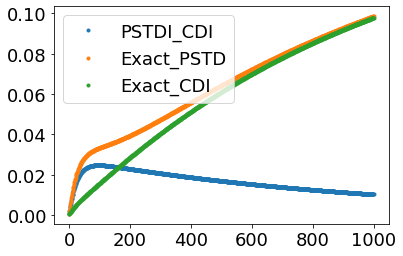

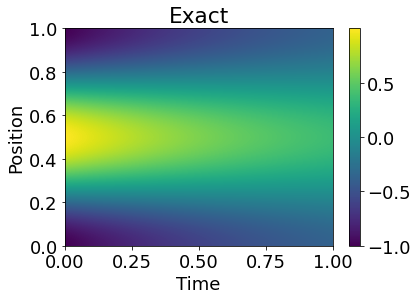


 here 

0.0019569471624266144
0.0019569471624266144
0.001
0.001

 here 



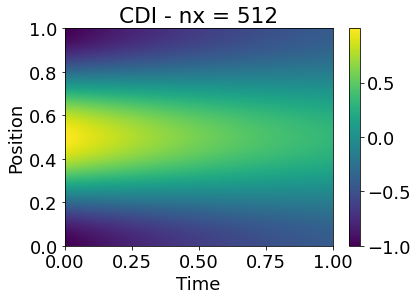

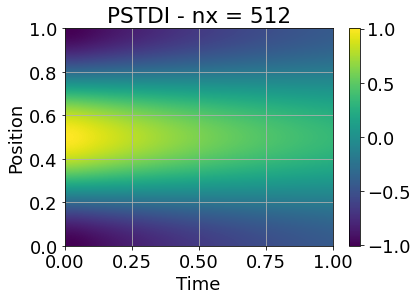

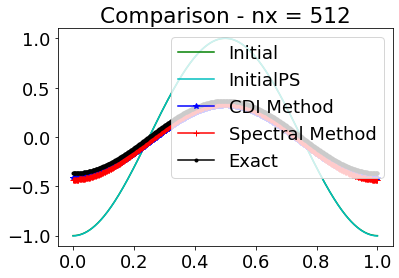

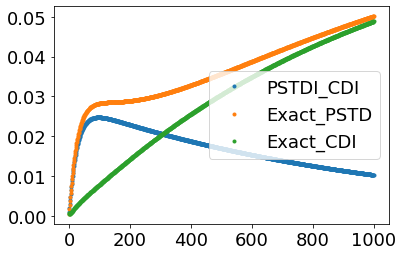

C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log
C:\Users\gaura\anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


<Figure size 720x144 with 0 Axes>

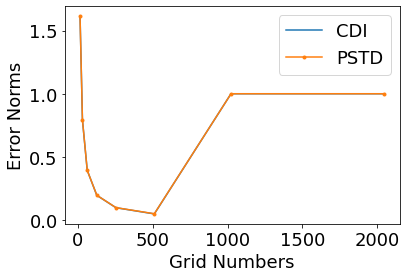

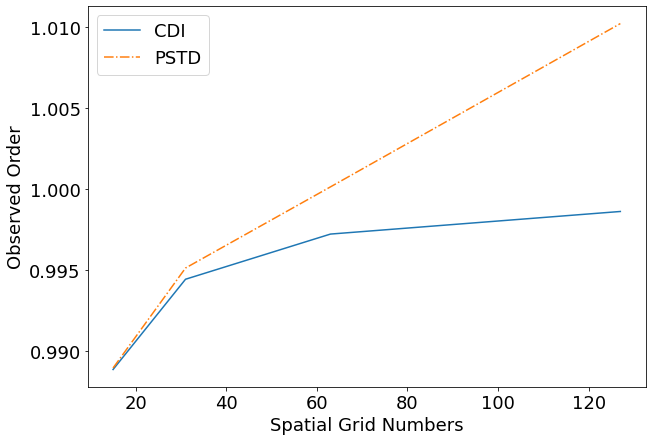

In [31]:
# Equation with decay terms 

# Spatial MMS tests
errorsx = np.ones((8, 2))
errornorms = np.ones(8)
nx = 32;
nt = 1000;
nxs = [15, 31, 63, 127, 255, 511, 1023, 2047]
nts = [250, 500, 1000, 2000, 4000]
for i in range(6):
    errornorms = numericalcodes(nxs[i], nt)
    errorsx[i, 0] = errornorms[0]
    errorsx[i, 1] = errornorms[1]
fig = plt.figure()
plt.figure()
fig.set_size_inches(10.,2.)
plt.plot(nxs, errorsx[:, 0], '-', label = 'CDI')
plt.plot(nxs, errorsx[:, 1], '.-', label = 'PSTD')

plt.xlabel('Grid Numbers')
plt.ylabel('Error Norms')
plt.legend()

fig = plt.figure()
fig.set_size_inches(10.,7.)
px = np.zeros((6, 2))
for g in range(6):
    for k in range(2):
        px[g, k] = np.log((np.abs(errorsx[g+2, k]) - np.abs(errorsx[g+1, k]))/(np.abs(errorsx[g+1, k]) - np.abs(errorsx[g, k])))/(np.log(nxs[g]/nxs[g+1]))

plt.plot(nxs[0:6], px[:, 0], '-', label = 'CDI')
plt.plot(nxs[0:6], px[:, 1], '-.', label = 'PSTD')

plt.xlabel('Spatial Grid Numbers')
plt.ylabel('Observed Order')
plt.legend()

# Printing the spatial grid tests

zipped1 = list(zip(nxs, errorsx[:, 0], errorsx[:, 1], px[:, 0], px[:, 1]))
df2 = pd.DataFrame(zipped1, columns=['Spatial Discretization Numbers', 'CDI_Error', 'PSTD_Error', 'CDI_Order', 'PSTD_Order'])

df2.to_csv('Analysis_Spatial25_Complete.csv', index=False)


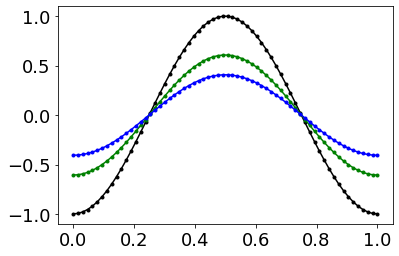

In [38]:
a = 1.0;
b = 0.01;
c = 0.0;
Co = 1.0;
L = 1.0
T = 1.0
dm = np.zeros((nx+1, nt+1));
U_exact = np.zeros((nx+1, nt+1));
# Define x & t
x = np.linspace(0, L, nx+1)
t = np.linspace(0, T, nt+1)
for i in range(nt+1):
    for j in range (nx+1):
        U_exact[j, i] = Co*np.cos(np.pi*(2*x[j]-1))*np.exp(-t[i])


plt.plot(x, U_exact[:, 1], '.-', color = 'k', label = 'Exact0');
plt.plot(x, U_exact[:, 500], '.-', color = 'g', label = 'Exact500');
plt.plot(x, U_exact[:, 900], '.-', color = 'b', label = 'Exact900');

In [32]:
def tests2(a, b, c, d, nx, nt):

    L = 1.0
    T = 1.0


    x = np.linspace(0, L, nx+1)
    t = np.linspace(0, T, nt+1)
    xin = np.linspace(0, L, nx+1);
    u = np.exp(-x**2)#np.sin(np.pi*xin)
    ui = u;
    U_CDI = np.zeros((nx+1, nt+1))
    error_2norm_CDI_PSTD = np.zeros(nt+1)

    # Discretization of space and time
    dx = L/(nx-1)
    dt = T/(nt+1)


    #plt.figure()
    #plt.plot(u, label='Initial')
    def numerical_scheme_CDI(u_CDI, a, b, c, d, dx, dt):
        alpha = a*dt/dx
        beta = b*dt/dx**2
        nx = len(u_CDI)-1;
        A = np.zeros((nx+1, nx+1))
        bi = d*dt+u_CDI;
        for j in range(1, len(u_CDI)-1):

            A[j, j-1] = -(beta[j]-alpha[j]/2)
            A[j, j] = 1+2*beta[j]-c[j]*dt
            A[j, j+1] = -(beta[j]+alpha[j]/2)

        # Applying first order Periodic Boundary Condition
        A[0, 0]=(1+2*beta[0])-c[0]*dt;
        A[0, 1]= (-alpha[0]/2-beta[0])
        A[0, nx]= (alpha[0]/2-beta[0])    


        A[nx, 0]= (-alpha[nx]/2-beta[nx]) ;
        A[nx, nx-1]= (alpha[nx]/2 - beta[nx])
        A[nx, nx]= 1+2*beta[nx]-c[nx]*dt    

        u_CDI = solve(A, bi)

        return u_CDI



    # Apply the numerical scheme
    U_CDI = np.zeros((nx+1, nt+1))
    error_2norm_QI_PSTD = np.zeros(nt)

    u_CDI=u;

    for n in range(nt):
        u_CDI = numerical_scheme_CDI(u_CDI, a, b, c, d, dx, dt)
        U_CDI[:, n] = u_CDI

    plt.rcParams['font.size'] = 18
    fig = plt.figure() 
    plt.imshow(U_CDI, cmap='viridis', extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    title = "CDI - nx = "+str(nx+1)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.show()


    k = 2*np.pi*np.fft.rfftfreq(nx+1, L/(nx))
    k2=k**2;

    # Defining variables
    U_ps = np.zeros((nx+1, nt+1))

    # Solving over time
    for i in range(nt+1): # 
        
        uk = np.fft.rfft(u)

        uk[:] = (uk[:])/(1-(-b*k**2 + a*1j*k+c)*dt) 
        u = np.fft.irfft(uk) + d*dt
        U_ps[:, i] = u
        error =  U_CDI[:, i] - u
        error_2norm_CDI_PSTD[i] =np.linalg.norm(error)/np.sqrt(nx)
 

    fig = plt.figure()  
    plt.imshow((U_ps), cmap='viridis',  extent=[0, T, 0, L], aspect='auto')
    plt.colorbar()
    plt.title("CD Scheme with PSTD")
    plt.xlabel('Time')
    plt.ylabel('Position')
    title = "PSTDI - nx = "+str(nx+1)
    plt.title(title)
    plt.grid(True)
    plt.show()
    plt.close()

    plt.figure();
    plt.plot(x, ui, '-', color='g', label = 'Initial'); 

    plt.plot(x, U_CDI[:, nt-1], '-*', color='b', label = 'CDI Method'); 
    plt.plot(x, U_ps[:, nt-1], '-+', color = 'r', label = 'Spectral Method');
    res =  [U_CDI[:, nt-1], U_ps[:, nt-1]]
    # print(np.shape(res))
    plt.legend(loc="upper right")
    title = "Comparison - nx = "+str(nx+1)
    plt.title(title)
    plt.show()
    plt.close()
    plt.figure()
    plt.plot(error_2norm_CDI_PSTD[0:nt], '.', label = 'PSTDI_CDI')
    plt.legend()
    plt.show()
    plt.close()
    return res

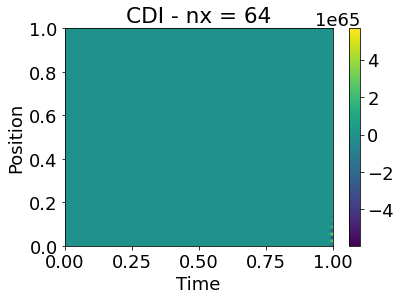

ValueError: operands could not be broadcast together with shapes (64,) (33,) 

In [33]:
nx = 63
x = np.linspace(0,1, nx+1)
a = 1.0*np.sin(np.pi*x)
b = 0.01*np.cos(np.pi*x)
c = a+10*b; 
d = a-10*b;

tests2(a, b, c, d, nx, 1000)

nx = 127
x = np.linspace(0,1, nx+1)
a = 1.0*np.sin(np.pi*x)
b = 0.01*np.cos(np.pi*x)
c = a+10*b; 
d = a-10*b;
tests2(a, b, c, d, nx, 1000)

nx = 255
x = np.linspace(0,1, nx+1)
a = 1.0*np.sin(np.pi*x)
b = 0.01*np.cos(np.pi*x)
c = a+10*b; 
d = a-10*b;
res = tests2(a, b, c, d, nx, 1000)
print('ldd')
plt.figure();
plt.plot(res[0], '-*', color='b', label = 'CDI Method'); 
plt.plot(res[1], '-+', color = 'r', label = 'Spectral Method');
plt.legend(loc="upper right")
title = "Comparison - nx = "+str(nx+1)
plt.title(title)
plt.show()
plt.close()
